# **TAREA MÓDULO 42 - Daniel Ortega**

El siguiente proyecto es un modelo de Machine Learning para predecir. Utilizaremos un DataFrame de un Banco que hemos a lo largo del curso.

____
# **I** - EDA

In [93]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import os
import requests

In [94]:
os.chdir(r'C:\Users\danielortega\OneDrive - HOTELERA YALKUITO SA DE CV\Desktop\No Borrar Daniel\30 Data Analyst - Curso\48_Módulo_42_Introducción_Machine_Learnin_II')

In [95]:
df = pd.read_csv(r'C:\Users\danielortega\OneDrive - HOTELERA YALKUITO SA DE CV\Desktop\No Borrar Daniel\30 Data Analyst - Curso\48_Módulo_42_Introducción_Machine_Learnin_II\bank-full.csv', sep=';')

In [96]:
df.sample(3)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
43130,61,management,married,tertiary,no,87,yes,no,cellular,24,feb,190,2,-1,0,unknown,no
5907,24,technician,single,secondary,no,-256,yes,no,unknown,26,may,110,2,-1,0,unknown,no
24749,57,self-employed,married,tertiary,no,894,yes,no,cellular,18,nov,79,1,-1,0,unknown,no


In [97]:
columnas = df.columns

for i in columnas:
    print(f'Columna: {i} - Tipo de dato: {df[i].dtype} - Valores únicos: {df[i].nunique()}')

Columna: age - Tipo de dato: int64 - Valores únicos: 77
Columna: job - Tipo de dato: object - Valores únicos: 12
Columna: marital - Tipo de dato: object - Valores únicos: 3
Columna: education - Tipo de dato: object - Valores únicos: 4
Columna: default - Tipo de dato: object - Valores únicos: 2
Columna: balance - Tipo de dato: int64 - Valores únicos: 7168
Columna: housing - Tipo de dato: object - Valores únicos: 2
Columna: loan - Tipo de dato: object - Valores únicos: 2
Columna: contact - Tipo de dato: object - Valores únicos: 3
Columna: day - Tipo de dato: int64 - Valores únicos: 31
Columna: month - Tipo de dato: object - Valores únicos: 12
Columna: duration - Tipo de dato: int64 - Valores únicos: 1573
Columna: campaign - Tipo de dato: int64 - Valores únicos: 48
Columna: pdays - Tipo de dato: int64 - Valores únicos: 559
Columna: previous - Tipo de dato: int64 - Valores únicos: 41
Columna: poutcome - Tipo de dato: object - Valores únicos: 4
Columna: y - Tipo de dato: object - Valores ún

In [98]:
for i in columnas:
    print('\n')
    print(f'{i} {df[i].unique()}')



age [58 44 33 47 35 28 42 43 41 29 53 57 51 45 60 56 32 25 40 39 52 46 36 49
 59 37 50 54 55 48 24 38 31 30 27 34 23 26 61 22 21 20 66 62 83 75 67 70
 65 68 64 69 72 71 19 76 85 63 90 82 73 74 78 80 94 79 77 86 95 81 18 89
 84 87 92 93 88]


job ['management' 'technician' 'entrepreneur' 'blue-collar' 'unknown'
 'retired' 'admin.' 'services' 'self-employed' 'unemployed' 'housemaid'
 'student']


marital ['married' 'single' 'divorced']


education ['tertiary' 'secondary' 'unknown' 'primary']


default ['no' 'yes']


balance [ 2143    29     2 ...  8205 14204 16353]


housing ['yes' 'no']


loan ['no' 'yes']


contact ['unknown' 'cellular' 'telephone']


day [ 5  6  7  8  9 12 13 14 15 16 19 20 21 23 26 27 28 29 30  2  3  4 11 17
 18 24 25  1 10 22 31]


month ['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr' 'sep']


duration [ 261  151   76 ... 1298 1246 1556]


campaign [ 1  2  3  5  4  6  7  8  9 10 11 12 13 19 14 24 16 32 18 22 15 17 25 21
 43 51 63 41 26 28 55 50 

In [99]:
df.shape

(45211, 17)

## **INSIGHTS**

- Tenemos un DataFrame de 45,211 líneas por 17 columnas.
- Los tipos de datos son correctos, los numéricos son int y los textos los tenemos como object.
- La columna de 'Y' no sabemos a qué hace referencia. Tal vez podemos eliminarla.
- la columna de 'Default' tampoco sabemos a qué hace refrencia. Tal vez podemos eliminarla.

____
# **II** - Field Engineering

Vamos a eliminar las columnas que no sabemos para qué sirven o a qué hacen referencia

In [100]:
df.drop(columns=['y', 'default'], inplace=True)

In [101]:
df.isna().sum()

age          0
job          0
marital      0
education    0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
dtype: int64

**Insight**

- No tenemos valores nulos o valores vacios

In [102]:
df.sample(3)

,age,job,marital,education,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
39472,33,admin.,divorced,tertiary,777,no,yes,cellular,25,may,344,1,-1,0,unknown
37905,29,admin.,single,secondary,891,yes,no,cellular,14,may,172,2,352,1,failure
13399,54,management,married,secondary,4816,no,yes,cellular,9,jul,406,1,-1,0,unknown


In [103]:
df.describe().round(2).T

,count,mean,std,min,25%,50%,75%,max
age,45211.0,40.94,10.62,18.0,33.0,39.0,48.0,95.0
balance,45211.0,1362.27,3044.77,-8019.0,72.0,448.0,1428.0,102127.0
day,45211.0,15.81,8.32,1.0,8.0,16.0,21.0,31.0
duration,45211.0,258.16,257.53,0.0,103.0,180.0,319.0,4918.0
campaign,45211.0,2.76,3.10,1.0,1.0,2.0,3.0,63.0
pdays,45211.0,40.20,100.13,-1.0,-1.0,-1.0,-1.0,871.0
previous,45211.0,0.58,2.30,0.0,0.0,0.0,0.0,275.0


_____
# **III** - Visualización Básica

In [104]:
len(df.columns)

15

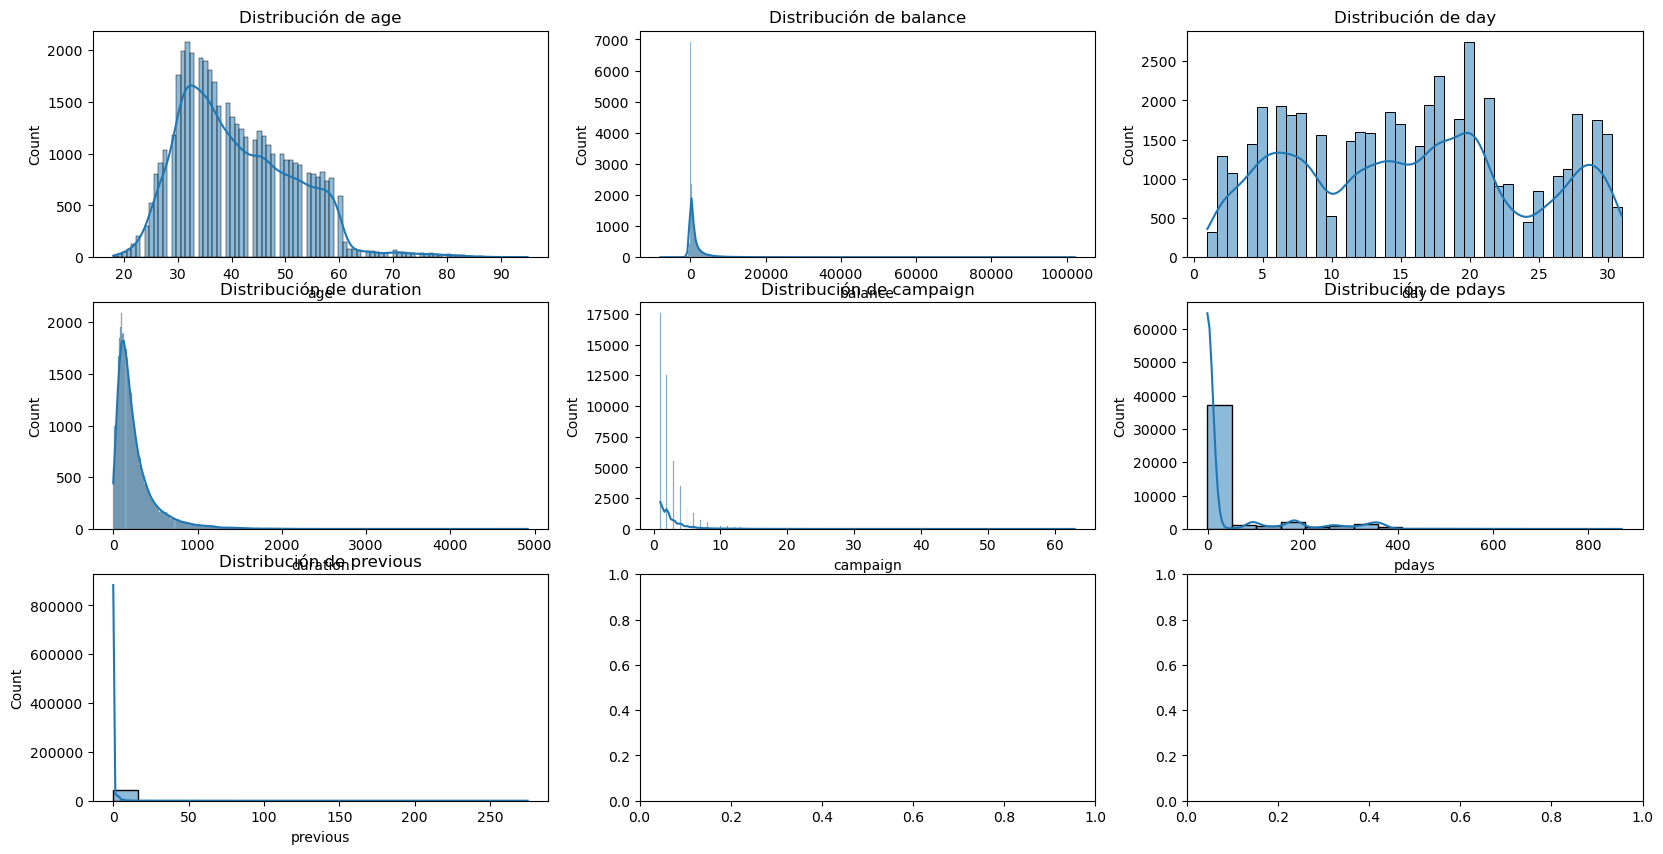

In [105]:
fig, axes = plt.subplots(3, 3, figsize=(20, 10))
for i, col in enumerate(df.select_dtypes(include=['int64']).columns):
    ax = axes[i // 3, i % 3]
    sns.histplot(df[col], ax=ax, kde=True)
    ax.set_title(f'Distribución de {col}')

## **Insights**

- Los campos de 'Previous', 'Campaign', 'Pdays', 'Duration', y 'Balance', tienen sesgos muy marcados a la derecha, por lo que podemos calcular sus logaritmos. 

In [106]:
df_numeric = df.select_dtypes(include=['int64'])
df_numeric.corr().round(2)

,age,balance,day,duration,campaign,pdays,previous
age,1.00,0.10,-0.01,-0.00,0.00,-0.02,0.00
balance,0.10,1.00,0.00,0.02,-0.01,0.00,0.02
day,-0.01,0.00,1.00,-0.03,0.16,-0.09,-0.05
duration,-0.00,0.02,-0.03,1.00,-0.08,-0.00,0.00
campaign,0.00,-0.01,0.16,-0.08,1.00,-0.09,-0.03
pdays,-0.02,0.00,-0.09,-0.00,-0.09,1.00,0.45
previous,0.00,0.02,-0.05,0.00,-0.03,0.45,1.00


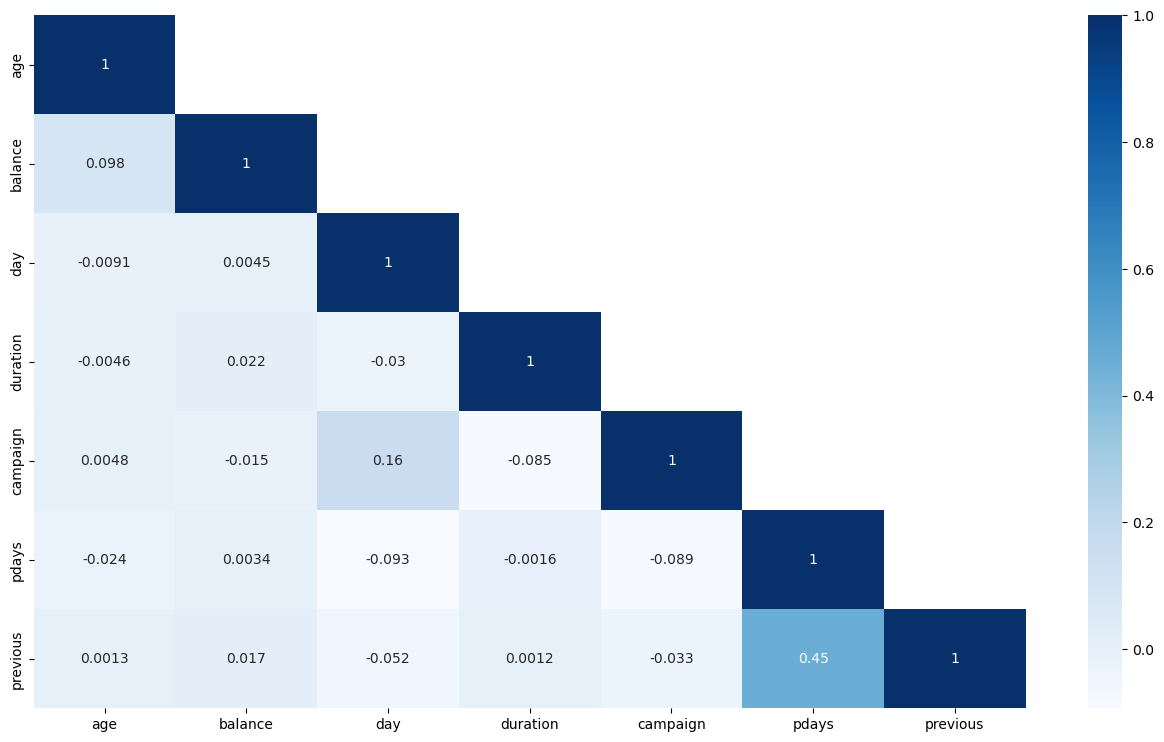

In [107]:
plt.figure(figsize=(16, 9))

corr_df = df_numeric.corr(method='pearson')

# Crear máscara triangular inferior
mask = np.tril(np.ones(corr_df.shape), k=0).astype(bool)

# Aplicar máscara
df_lt = corr_df.where(mask)

# Graficar
sns.heatmap(df_lt, cmap='Blues', annot=True)
plt.show()

## **Insights** 

- No tenemos ninguna variable que debamos eliminar por ser muy alta su correlación con otra. 
- La más alta es de pdays con previous con un 45%.

____
# **IV** - Análisis Bivariado

In [108]:
def grafica_corr(x):
    return df.groupby(x)[df.select_dtypes(include='number').columns].mean().round(2).T

In [109]:
x = 'loan'
grafica_corr(x)

loan,no,yes
age,41.01,40.56
balance,1474.45,774.31
day,15.77,16.02
duration,259.56,250.85
campaign,2.75,2.83
pdays,41.19,34.98
previous,0.59,0.52


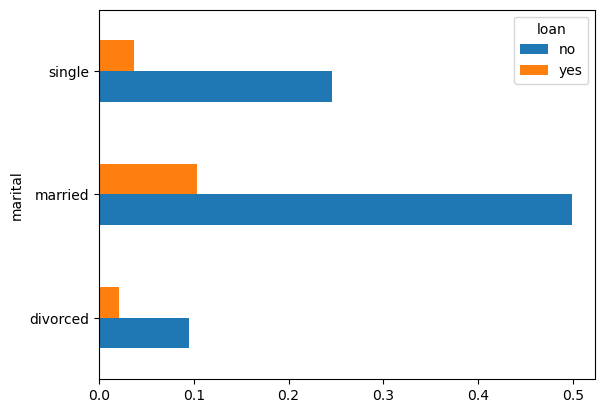

In [110]:
ct = pd.crosstab(df['marital'], df['loan'], normalize=True).plot.barh(stacked=False)

____
# **V** - Balance de Clases

In [111]:
categ_columns = df.select_dtypes(include=['object']).columns
for column in categ_columns:
    print('\n'+ column)
    print(df[column].value_counts())


job
job
blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: count, dtype: int64

marital
marital
married     27214
single      12790
divorced     5207
Name: count, dtype: int64

education
education
secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: count, dtype: int64

housing
housing
yes    25130
no     20081
Name: count, dtype: int64

loan
loan
no     37967
yes     7244
Name: count, dtype: int64

contact
contact
cellular     29285
unknown      13020
telephone     2906
Name: count, dtype: int64

month
month
may    13766
jul     6895
aug     6247
jun     5341
nov     3970
apr     2932
feb     2649
jan     1403
oct      738
sep      579
mar      477
dec      214
Name: count, dtype: int64

poutcome
poutcome
unknown    36959
failure     4901
o

## **Insights**

- La columna de 'job' tiene dos conceptos de 'student' y 'unkown' que tienen un 2% de representación cada uno. Podemos juntarlos y hacer una sola categoría llamada 'others'. 
- Debemos documentar que estas columnas se van a unir y que porcentaje de representación tiene cada una actualmente y por qué las vamos a unir en una sola categoría.

In [112]:
df['job'] = df['job'].replace({'student': 'others', 'unknown': 'others'})

In [113]:
df['job'].unique()

array(['management', 'technician', 'entrepreneur', 'blue-collar',
       'others', 'retired', 'admin.', 'services', 'self-employed',
       'unemployed', 'housemaid'], dtype=object)

____
# **VI** - Preparación antes del Split

In [114]:
df2 = df.copy()

In [115]:
print(df2['education'].unique())
print(df2['marital'].unique())
print(df2['housing'].unique())
print(df2['job'].unique())
print(df2['loan'].unique())



df2['education'] = df2['education'].astype('category')
df2['marital'] = df2['marital'].astype('category')
df2['housing'] = df2['housing'].astype('category')
df2['job'] = df2['job'].astype('category')
df2['loan'] = df2['loan'].astype('category')

['tertiary' 'secondary' 'unknown' 'primary']
['married' 'single' 'divorced']
['yes' 'no']
['management' 'technician' 'entrepreneur' 'blue-collar' 'others' 'retired'
 'admin.' 'services' 'self-employed' 'unemployed' 'housemaid']
['no' 'yes']


In [116]:
df

,age,job,marital,education,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,58,management,married,tertiary,2143,yes,no,unknown,5,may,261,1,-1,0,unknown
1,44,technician,single,secondary,29,yes,no,unknown,5,may,151,1,-1,0,unknown
2,33,entrepreneur,married,secondary,2,yes,yes,unknown,5,may,76,1,-1,0,unknown
3,47,blue-collar,married,unknown,1506,yes,no,unknown,5,may,92,1,-1,0,unknown
4,33,others,single,unknown,1,no,no,unknown,5,may,198,1,-1,0,unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,825,no,no,cellular,17,nov,977,3,-1,0,unknown
45207,71,retired,divorced,primary,1729,no,no,cellular,17,nov,456,2,-1,0,unknown
45208,72,retired,married,secondary,5715,no,no,cellular,17,nov,1127,5,184,3,success
45209,57,blue-collar,married,secondary,668,no,no,telephone,17,nov,508,4,-1,0,unknown


In [117]:
df2['previous_log'] = np.log1p(df2['previous']+1)
df2['campaign_log'] = np.log1p(df2['campaign']+1)
df2['pdays_log'] = np.log1p(df2['pdays']+1)
df2['duration_log'] = np.log1p(df2['duration']+1)
df2['balance_log'] = np.log1p(df2['balance']+1)

c:\Users\danielortega\AppData\Local\anaconda3\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)
c:\Users\danielortega\AppData\Local\anaconda3\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [118]:
df2.sample(3)

,age,job,marital,education,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,previous_log,campaign_log,pdays_log,duration_log,balance_log
5340,36,blue-collar,married,primary,973,yes,yes,unknown,23,may,293,1,-1,0,unknown,0.693147,1.098612,0.0,5.686975,6.882437
5925,31,management,single,tertiary,-307,yes,yes,unknown,26,may,91,2,-1,0,unknown,0.693147,1.386294,0.0,4.532599,NaN
4802,37,admin.,single,tertiary,-898,yes,no,unknown,21,may,482,1,-1,0,unknown,0.693147,1.098612,0.0,6.182085,NaN


<Axes: >

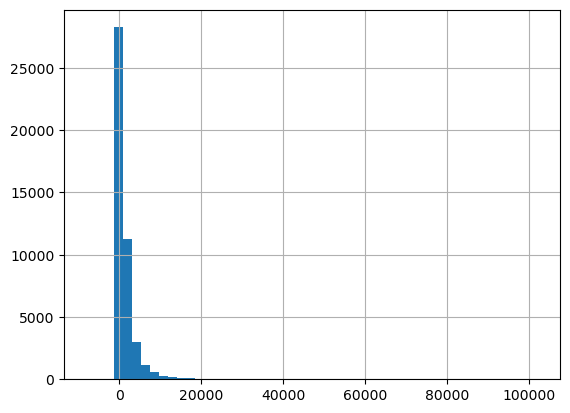

In [119]:
df['balance'].hist(bins=50)

**Insight**

- Tenemos un desbalanceo en 'balance' con un valor único arriba de los 10,000

In [120]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df2['balance_scaled'] = scaler.fit_transform(df2[['balance']])

In [121]:
print('Lista de columnas:')
print('________________________')
for col in df2.columns:
    print(col)

Lista de columnas:
________________________
age
job
marital
education
balance
housing
loan
contact
day
month
duration
campaign
pdays
previous
poutcome
previous_log
campaign_log
pdays_log
duration_log
balance_log
balance_scaled


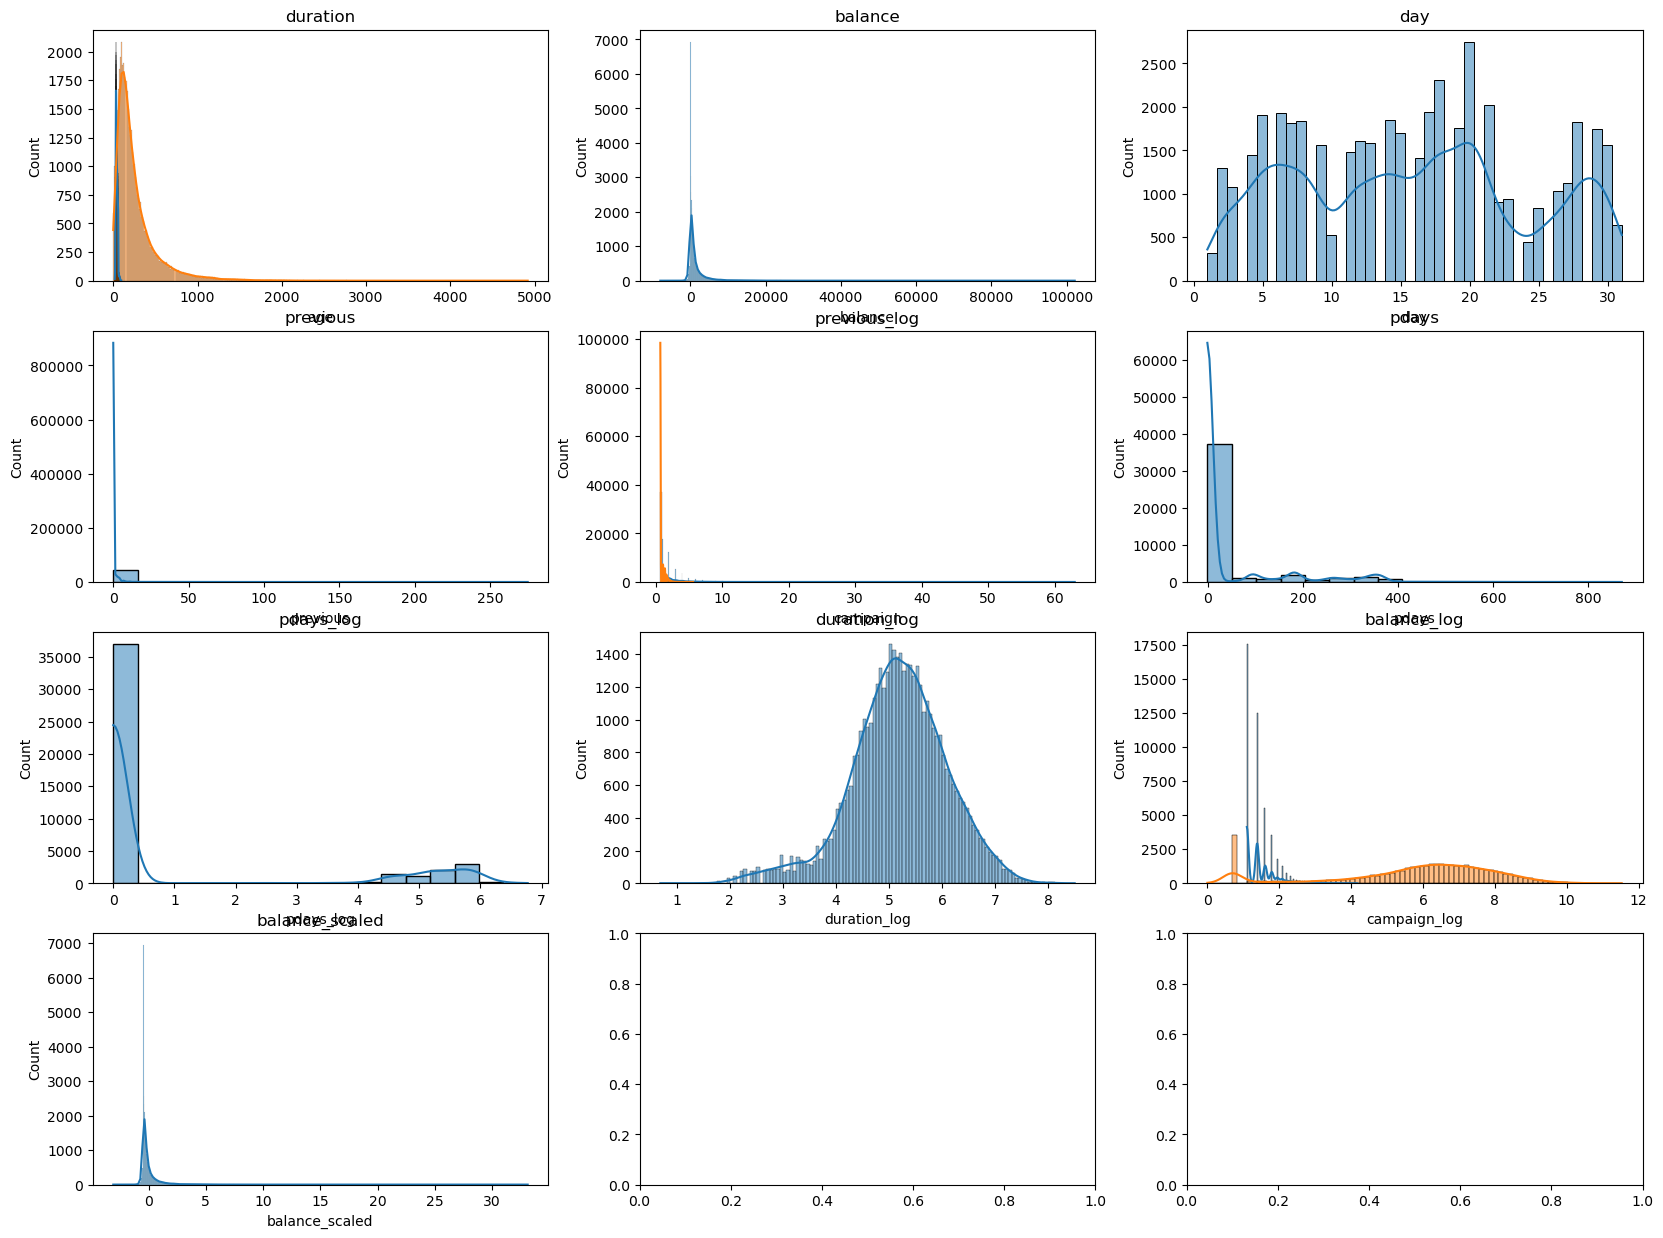

In [122]:
fig, axes = plt.subplots(4, 3, figsize=(20, 15))
for i, col in enumerate(df2.select_dtypes(include=['int64', 'float64']).columns):
    sns.histplot(df2[col], kde=True, ax=axes[i//4, i%3])
    axes[i//4, i%3].set_title(col)

___
# **VII** - Data Split

In [123]:
from sklearn.model_selection import train_test_split
X = df2.drop(columns=['poutcome'])
y = df2['poutcome']

x = pd.get_dummies(X, drop_first=True)

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)

In [124]:
X_train.sample(3)

,age,balance,day,duration,campaign,pdays,previous,previous_log,campaign_log,pdays_log,...,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep
33369,37,2320,20,59,3,342,1,1.098612,1.609438,5.840642,...,False,False,False,False,False,False,False,False,False,False
36960,43,359,12,899,3,-1,0,0.693147,1.609438,0.000000,...,False,False,False,False,False,False,True,False,False,False
20809,51,97,13,286,2,-1,0,0.693147,1.386294,0.000000,...,False,False,False,False,False,False,False,False,False,False


In [125]:
print('{0:0.2f}% data is in training set'.format((len(X_train) /len(df2.index))*100))
print('{0:0.2f}% data is in test set'.format((len(X_test) /len(df2.index))*100))

70.00% data is in training set
30.00% data is in test set


In [126]:
print('Original response true values:       :   {0} ({1:0.2f}%)'.format(len(df2.loc[df2['poutcome'] == 1]), (len(df2.loc[df2['poutcome'] == 1]) / len(df2.index)) * 100))
print('Original response false values:      :   {0} ({1:0.2f}%)'.format(len(df2.loc[df2['poutcome'] == 0]), (len(df2.loc[df2['poutcome'] == 0]) / len(df2.index)) * 100))
print('Training response true values:       :   {0} ({1:0.2f}%)'.format(len(y_train.loc[y_train == 1]), (len(y_train.loc[y_train == 1]) / len(y_train.index)) * 100))
print('Training response false values:      :   {0} ({1:0.2f}%)'.format(len(y_train.loc[y_train == 0]), (len(y_train.loc[y_train == 0]) / len(y_train.index)) * 100))
print('Test response true values:           :   {0} ({1:0.2f}%)'.format(len(y_test.loc[y_test == 1]), (len(y_test.loc[y_test == 1]) / len(y_test.index)) * 100))
print('Test response false values:          :   {0} ({1:0.2f}%)'.format(len(y_test.loc[y_test == 0]), (len(y_test.loc[y_test == 0]) / len(y_test.index)) * 100))

Original response true values:       :   0 (0.00%)
Original response false values:      :   0 (0.00%)
Training response true values:       :   0 (0.00%)
Training response false values:      :   0 (0.00%)
Test response true values:           :   0 (0.00%)
Test response false values:          :   0 (0.00%)


_____

# **VIII** - Prueba Simple con Regresión Logística

- Al ser las respuestas 0 y 1, se tiene que la regresión logística es el modelo elegido.
- Se usa la librería 'LogisticRegression' para ejecutar la regresión.
- Se debe tener en cuenta que el modelo hace fit con el set de Training (X_train, Y_train).
- Y luego el modelo hace la predicción con el modelo de Test.

In [128]:
from sklearn import metrics
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(class_weight={0:0.15,1:0.85}, solver='liblinear')
model.fit(X_train, y_train)

y_predict = model.predict(X_test)

ValueError: Input X contains NaN.
LogisticRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [129]:
y_predict[0:100]

NameError: name 'y_predict' is not defined

In [130]:
z = X_test.copy()
z['Response real'] = y_test
z['Response predicción'] = y_predict
z[['Response real', 'Response predicción']].sample(10)

NameError: name 'y_predict' is not defined

In [ ]:
coef_df = pd.DataFrame(model.coef_)
coef_df.columns = X_train.columns

coef_df['intercept'] = model.intercept_
coef_df.T

____
# **IX** - Matriz de Confusión

In [131]:
cm=metrics.confusion_matrix(y_test, y_predict, labels=[1,0])

df_cm = pd.DataFrame(cm, index=[ i for i in ['Observado 1', 'Observado 0']],
                     columns=[i for i in ['Predicción 1', 'Predicción 0']])
plt.figure(figsize=(8, 4))
sns.heatmap(df_cm, annot=True, cmap='Blues', fmt='d').set_title('Matriz de Confusión', size=15)

NameError: name 'y_predict' is not defined

In [132]:
df_cm

NameError: name 'df_cm' is not defined

In [133]:
TP = df_cm.iloc[0, 0]  # Verdaderos Positivos
TN = df_cm.iloc[1, 1]  # Verdaderos Negativos
FP = df_cm.iloc[0, 1]  # Falsos Positivos
FN = df_cm.iloc[1, 0]  # Falsos Negativos

print(f'Verdaderos Positivos (TP): {TP}')
print(f'Verdaderos Negativos (TN): {TN}')
print(f'Falsos Positivos (FP): {FP}')
print(f'Falsos Negativos (FN): {FN}')

NameError: name 'df_cm' is not defined

In [134]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
y_pred = model.predict(X_test)
model_score = accuracy_score(y_test, y_pred)
recal_score = recall_score(y_test, y_pred)
precision_score = precision_score(y_test, y_pred)
f1_score = f1_score(y_test, y_pred)

print('Medidas de Precisión del Modelo:')
print('________________________')
print(f'Precisión del modelo: {model_score:.2f}')
print(f'Recall del modelo: {recal_score:.2f}')
print(f'Precisión del modelo: {precision_score:.2f}')
print(f'F1 Score del modelo: {f1_score:.2f}')
print('Roc Auc Score del modelo: {0:.2f}'.format(metrics.roc_auc_score(y_test, y_pred)))

ValueError: Input X contains NaN.
LogisticRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [135]:
y_hats = pd.DataFrame(y_pred)

df_out = y_test.reset_index()
df_out['Actual'] = y_test.reset_index()['Response']
df_out['Prediction'] = y_hats.reset_index()[0]
df_out.drop('index', axis=1, inplace=True)

df_out = df_out[df_out['Actual'] != df_out['Prediction']]
print(len(df_out), ' registros donde lo observado <> predicho')

NameError: name 'y_pred' is not defined

In [136]:
df_out.head(10)

NameError: name 'df_out' is not defined